In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from dateutil.parser import parse

In [2]:
#importa datos del aranet4
aranet = pd.read_csv("../data/aranet4.csv",index_col=0,parse_dates=True,
                    names=["aranet","To","HR","P"],skiprows=1)


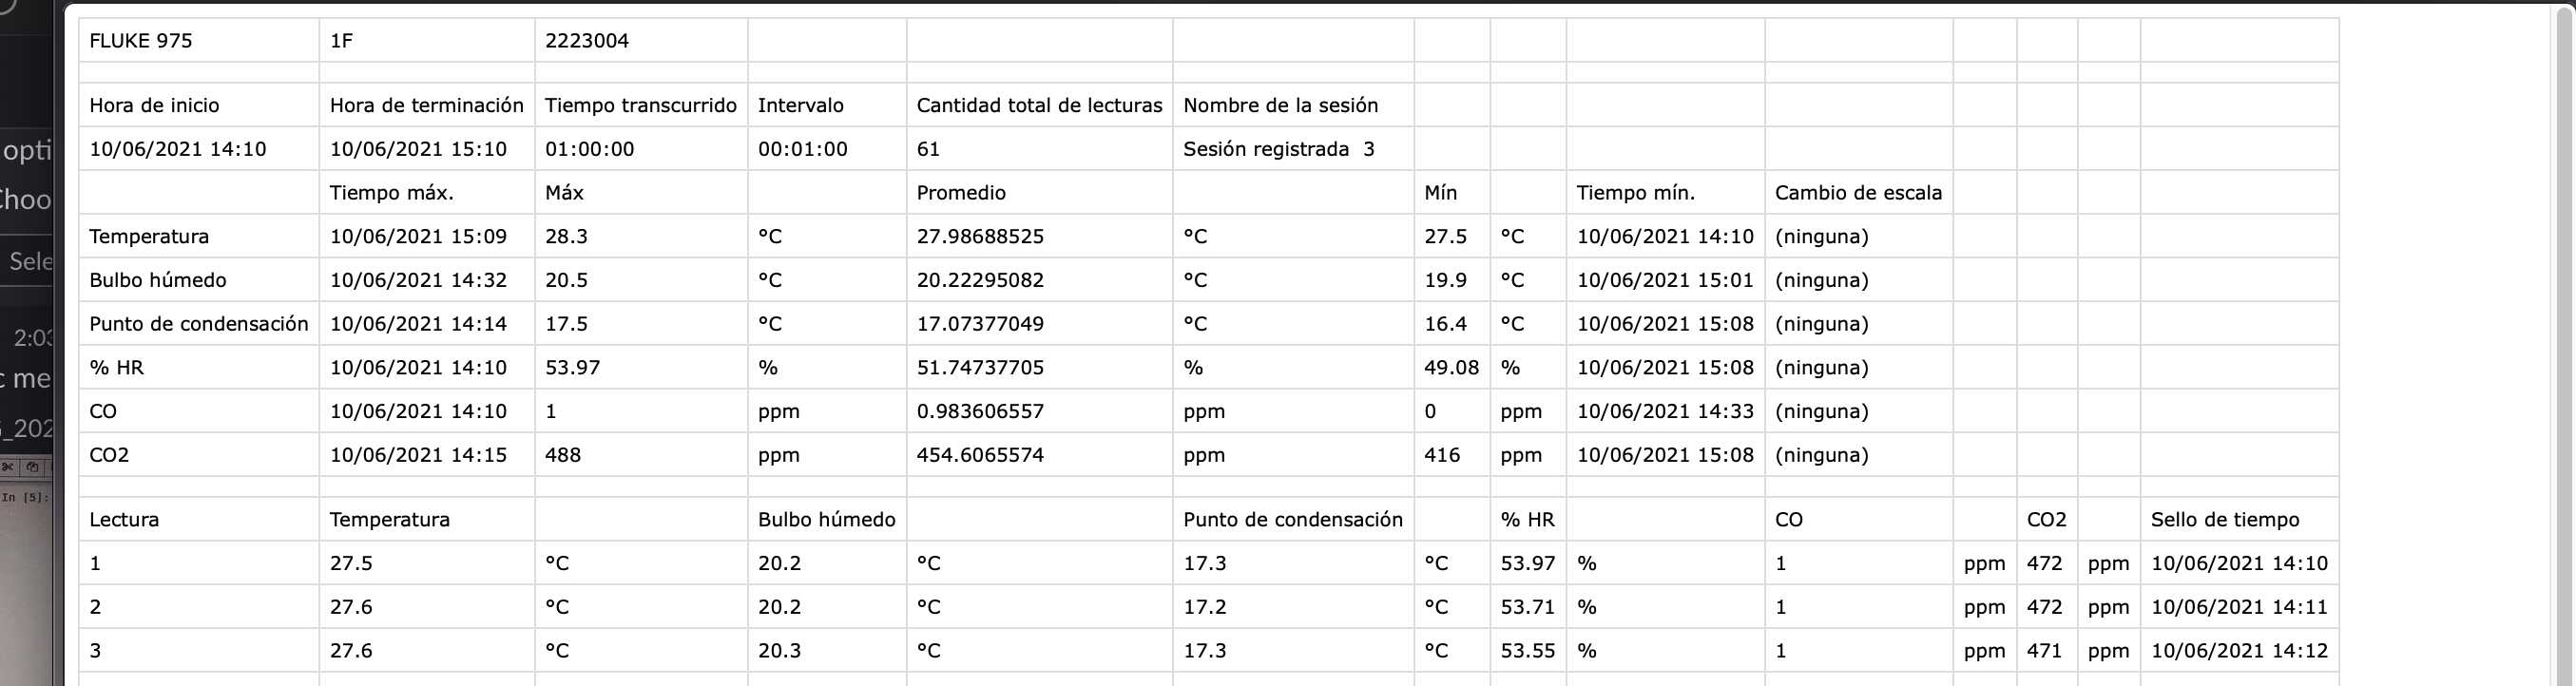

In [3]:
#importa datos del fluke
fluke = pd.read_csv("../data/fluke.csv",encoding="iso-8859-1",
                   skiprows=13,usecols=[11,13],
                   names=["fluke","tiempo"],)
fluke.tiempo = pd.to_datetime(fluke.tiempo,format="%d/%m/%Y %H:%M")
fluke.set_index("tiempo",inplace=True)

In [6]:
referencia = pd.concat([aranet.aranet,fluke.fluke],axis=1)
referencia

,aranet,fluke
2021-06-07 00:42:25,381.0,NaN
2021-06-07 00:43:25,381.0,NaN
2021-06-07 00:44:25,381.0,NaN
2021-06-07 00:45:25,381.0,NaN
2021-06-07 00:46:25,416.0,NaN
...,...,...
2021-06-10 15:06:00,NaN,424.0
2021-06-10 15:07:00,NaN,421.0
2021-06-10 15:08:00,NaN,416.0
2021-06-10 15:09:00,NaN,431.0


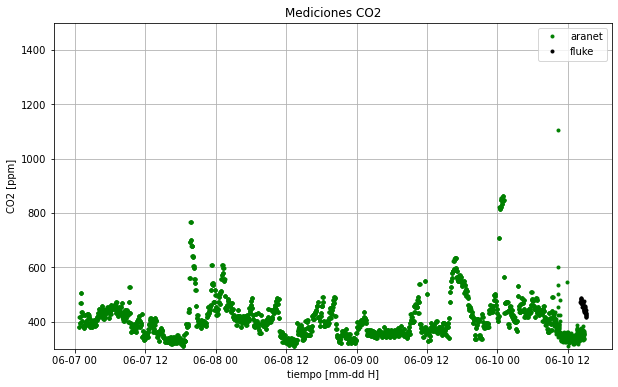

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

# fecha1 = parse("2021-06-21") 
# fecha2 = fecha1 + pd.Timedelta("2D")

# ax.set_xlim(fecha1,fecha2)
ax.set_ylim(300,1500)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo [mm-dd H]")
ax.set_title("Mediciones CO2")

ax.plot(referencia.aranet,"g.",label="aranet")
ax.plot(referencia.fluke, "k.",label="fluke")


ax.legend()
ax.grid()

In [9]:
referencia.to_csv("../data/referencia.csv")